In [1]:
import os
import csv
import pandas as pd
import zipfile

In [2]:
#Initialize file
canada = pd.read_csv("Canada_Housing_RAW.csv")
canada.head()

,REF_DATE,GEO,DGUID,Period of construction (13),Structural type of dwelling (10),Statistics (3C),Dwelling condition (4),Tenure (4),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2021,Canada,2021A000011124,Total - Period of construction,Total - Structural type of dwelling,Number of private households,Total - Dwelling condition,Total - Tenure,NaN,0,units,0,NaN,1.1.1.1.1.1,14978940.0,NaN,NaN,NaN,0
1,2021,Canada,2021A000011124,Total - Period of construction,Single-detached house,Number of private households,Total - Dwelling condition,Total - Tenure,NaN,0,units,0,NaN,1.1.2.1.1.1,7872200.0,NaN,NaN,NaN,0
2,2021,Canada,2021A000011124,Total - Period of construction,Apartment in a building that has five or more ...,Number of private households,Total - Dwelling condition,Total - Tenure,NaN,0,units,0,NaN,1.1.3.1.1.1,1595935.0,NaN,NaN,NaN,0
3,2021,Canada,2021A000011124,Total - Period of construction,Other attached dwelling,Number of private households,Total - Dwelling condition,Total - Tenure,NaN,0,units,0,NaN,1.1.4.1.1.1,5320715.0,NaN,NaN,NaN,0
4,2021,Canada,2021A000011124,Total - Period of construction,Apartment or flat in a duplex,Number of private households,Total - Dwelling condition,Total - Tenure,NaN,0,units,0,NaN,1.1.5.1.1.1,810300.0,NaN,NaN,NaN,0


In [3]:
#subset the columns
ggh_sub = canada[["GEO","DGUID","Structural type of dwelling (10)","Period of construction (13)","VALUE"]]
ggh_sub

,GEO,DGUID,Structural type of dwelling (10),Period of construction (13),VALUE
0,Canada,2021A000011124,Total - Structural type of dwelling,Total - Period of construction,14978940.0
1,Canada,2021A000011124,Single-detached house,Total - Period of construction,7872200.0
2,Canada,2021A000011124,Apartment in a building that has five or more ...,Total - Period of construction,1595935.0
3,Canada,2021A000011124,Other attached dwelling,Total - Period of construction,5320715.0
4,Canada,2021A000011124,Apartment or flat in a duplex,Total - Period of construction,810300.0
...,...,...,...,...,...
251508,"Kitikmeot, Unorganized",2021A00056208098,Apartment or flat in a duplex,2016 to 2021,NaN
251509,"Kitikmeot, Unorganized",2021A00056208098,Apartment in a building that has fewer than fi...,2016 to 2021,NaN
251510,"Kitikmeot, Unorganized",2021A00056208098,Other single-attached house,2016 to 2021,NaN
251511,"Kitikmeot, Unorganized",2021A00056208098,Row house,2016 to 2021,NaN


This map from Ontario was was used in order to select the CSDs within the Golden Horseshoe

https://www.ontario.ca/page/connecting-ggh-transportation-plan-greater-golden-horseshoe

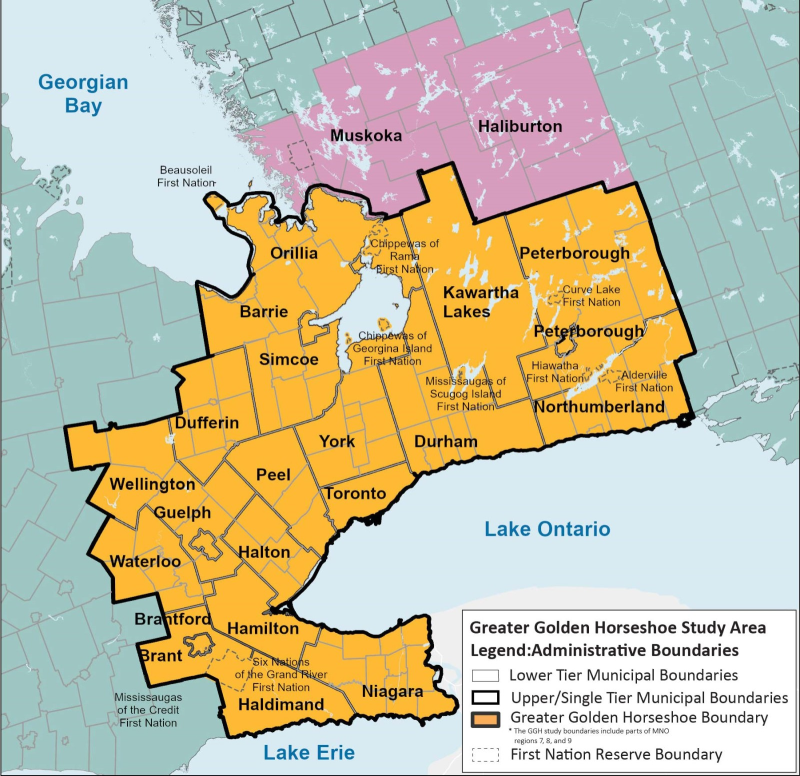

In [4]:
#Filter out by all CSDs inside of GGH boundary
ggh_housing = ggh_sub.loc[(ggh_sub['DGUID'].str.contains("3543"))|# Simcoe
                        (ggh_sub['DGUID'].str.contains("3522"))|# Dufferin
                        (ggh_sub['DGUID'].str.contains("3523"))|# Wellington
                        (ggh_sub['DGUID'].str.contains("3516"))|# Kawartha Lakes
                        (ggh_sub['DGUID'].str.contains("3515"))|# Peterborough
                        (ggh_sub['DGUID'].str.contains("3514"))|# Northumberland
                        (ggh_sub['DGUID'].str.contains("3518"))|# Durham
                        (ggh_sub['DGUID'].str.contains("3519"))|# York
                        (ggh_sub['DGUID'].str.contains("3520"))|# Toronto
                        (ggh_sub['DGUID'].str.contains("3521"))|# Peel
                        (ggh_sub['DGUID'].str.contains("3524"))|# Halton
                        (ggh_sub['DGUID'].str.contains("3530"))|# Waterloo
                        (ggh_sub['DGUID'].str.contains("3525"))|# Hamilton
                        (ggh_sub['DGUID'].str.contains("3529"))|# Brant
                        (ggh_sub['DGUID'].str.contains("3526"))|# Niagara
                        (ggh_sub['DGUID'].str.contains("3528"))]# Haldimand-Norlfolk
                        
ggh_housing

,GEO,DGUID,Structural type of dwelling (10),Period of construction (13),VALUE
106533,Northumberland,2021A00033514,Total - Structural type of dwelling,Total - Period of construction,37325.0
106534,Northumberland,2021A00033514,Single-detached house,Total - Period of construction,29525.0
106535,Northumberland,2021A00033514,Apartment in a building that has five or more ...,Total - Period of construction,845.0
106536,Northumberland,2021A00033514,Other attached dwelling,Total - Period of construction,6725.0
106537,Northumberland,2021A00033514,Apartment or flat in a duplex,Total - Period of construction,500.0
...,...,...,...,...,...
123274,Midland,2021A00053543074,Single-detached house,2016 to 2021,285.0
123275,Midland,2021A00053543074,Other attached dwelling,2016 to 2021,95.0
123276,Midland,2021A00053543074,Apartment or flat in a duplex,2016 to 2021,10.0
123277,Midland,2021A00053543074,Apartment in a building that has fewer than fi...,2016 to 2021,15.0


In [5]:
#rename columns to make more sense
ggh_final = ggh_housing.rename(columns = {"GEO" : "Name" , 
                                          "Structural type of dwelling (10)" : "Dwelling Type" , 
                                          "Period of construction (13)" : "Period of Construction" , 
                                          "VALUE" : "Number of Units"})
ggh_final

,Name,DGUID,Dwelling Type,Period of Construction,Number of Units
106533,Northumberland,2021A00033514,Total - Structural type of dwelling,Total - Period of construction,37325.0
106534,Northumberland,2021A00033514,Single-detached house,Total - Period of construction,29525.0
106535,Northumberland,2021A00033514,Apartment in a building that has five or more ...,Total - Period of construction,845.0
106536,Northumberland,2021A00033514,Other attached dwelling,Total - Period of construction,6725.0
106537,Northumberland,2021A00033514,Apartment or flat in a duplex,Total - Period of construction,500.0
...,...,...,...,...,...
123274,Midland,2021A00053543074,Single-detached house,2016 to 2021,285.0
123275,Midland,2021A00053543074,Other attached dwelling,2016 to 2021,95.0
123276,Midland,2021A00053543074,Apartment or flat in a duplex,2016 to 2021,10.0
123277,Midland,2021A00053543074,Apartment in a building that has fewer than fi...,2016 to 2021,15.0


In [6]:
#Export to CSV
ggh_final.to_csv('2021_GGH_DU_filtered.csv' , index = False)